In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Check basic info about the data
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Show some sample rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

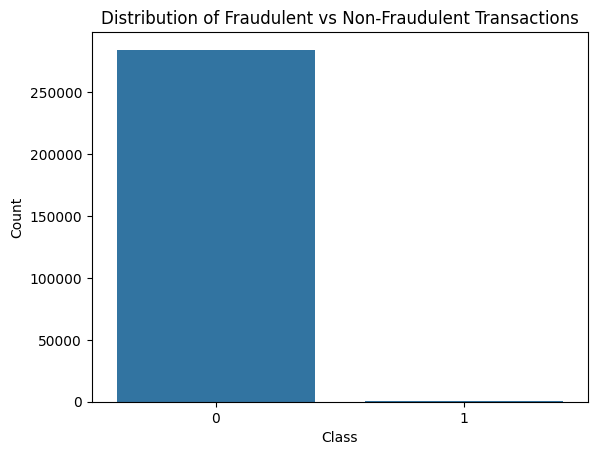

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable 'Class'
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


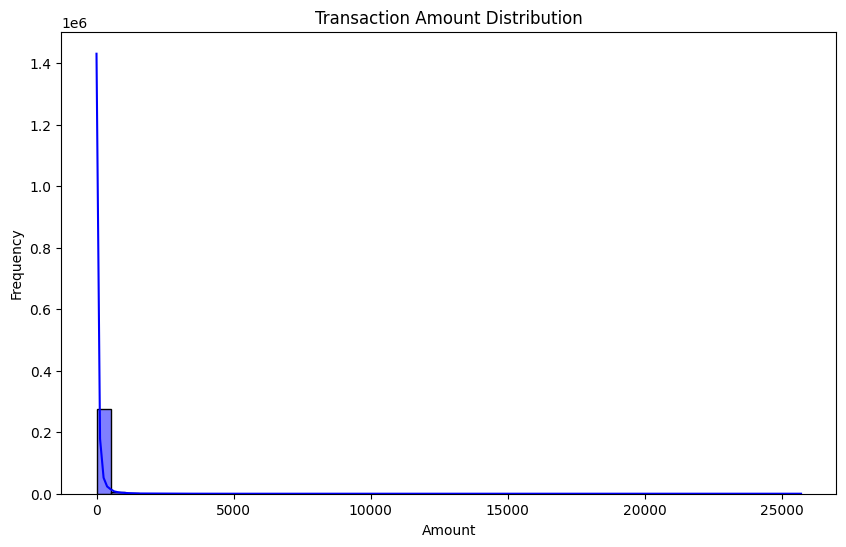

In [3]:
# Histogram of transaction amounts
plt.figure(figsize=(10,6))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


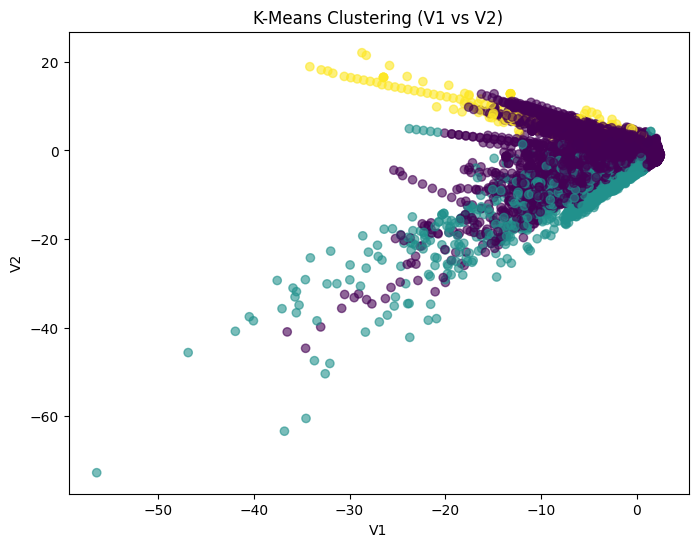

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize the features (exclude 'Time', 'Class', 'Amount')
features = df.drop(columns=['Class', 'Time'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply k-means clustering to the data
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Plot the results (Here, we are using two sample features 'V1' and 'V2')
plt.figure(figsize=(8,6))
plt.scatter(df['V1'], df['V2'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering (V1 vs V2)')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()


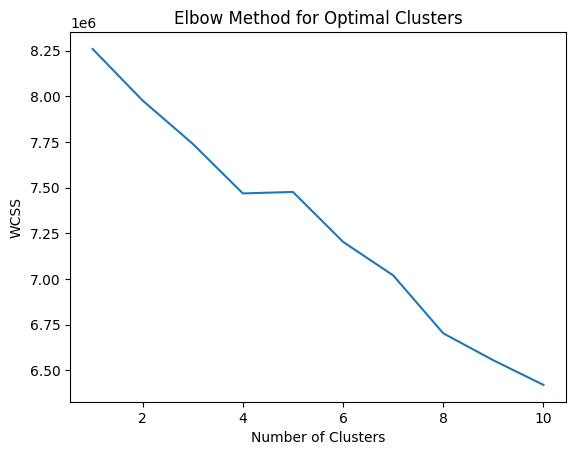

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


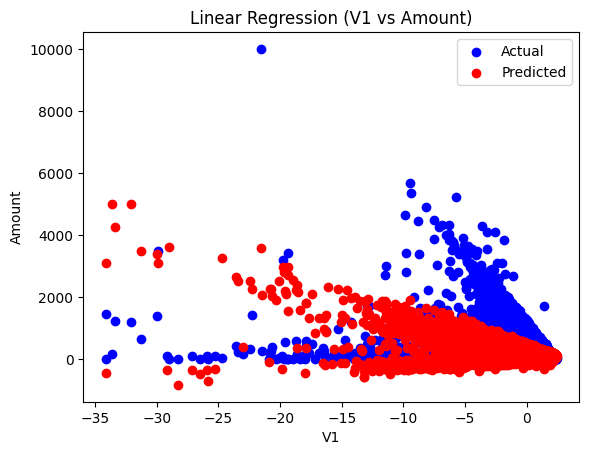

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Features for regression (V1, and V2)
X = df[['V1', 'V2']]
y = df['Amount']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the test set
y_pred = regressor.predict(X_test)

# Plot the regression results
plt.scatter(X_test['V1'], y_test, color='blue', label='Actual')
plt.scatter(X_test['V1'], y_pred, color='red', label='Predicted')
plt.title('Linear Regression (V1 vs Amount)')
plt.xlabel('V1')
plt.ylabel('Amount')
plt.legend()
plt.show()


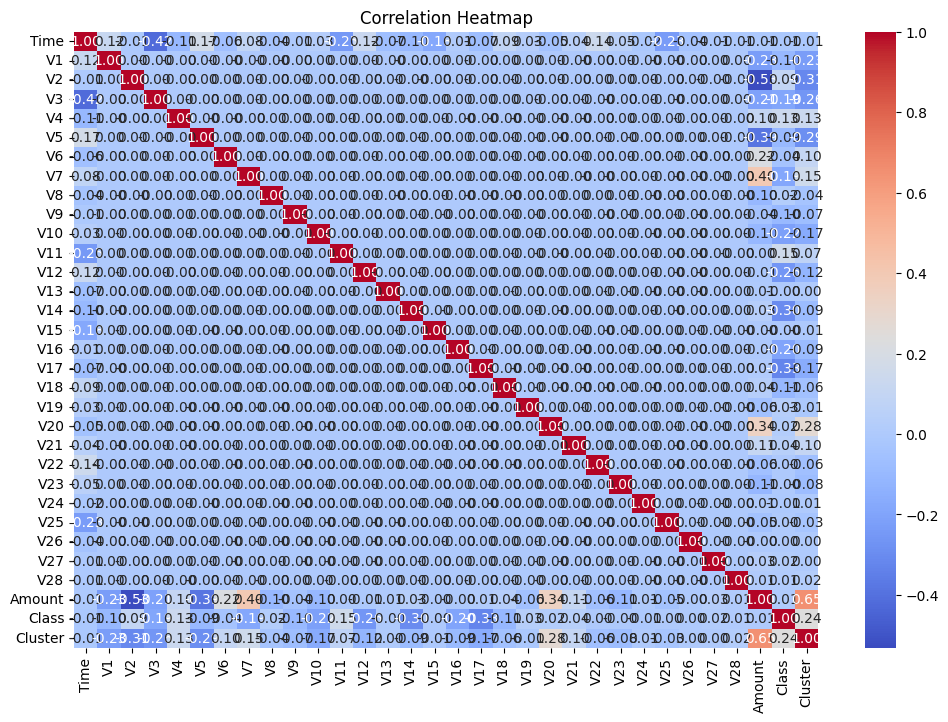

In [7]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
